# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.to_csv('../data/raw/df_raw.csv',index=False)

Vamos a hacer un análisis sobre el precio de una propiedad de AirBNB en NY City

In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Eliminar Duplicados

In [5]:
df['id'].duplicated().sum()

np.int64(0)

Eliminar columnas irrelevantes

In [6]:
df.drop(['id','name','host_name','last_review','reviews_per_month'],axis=1,inplace=True)

In [7]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Analisis de variables univariante

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Analisis de las variables categóricas

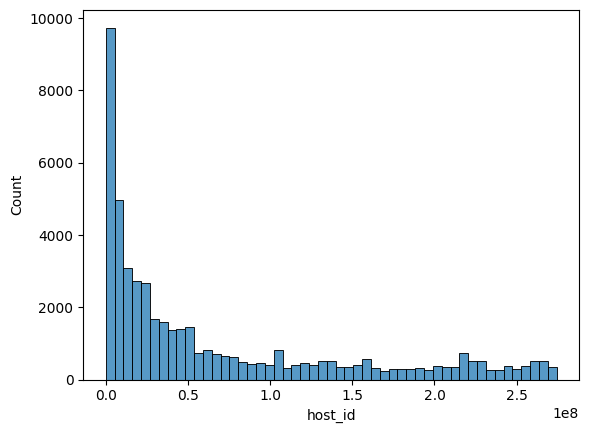

In [9]:
sns.histplot(data=df,x='host_id')
plt.show()

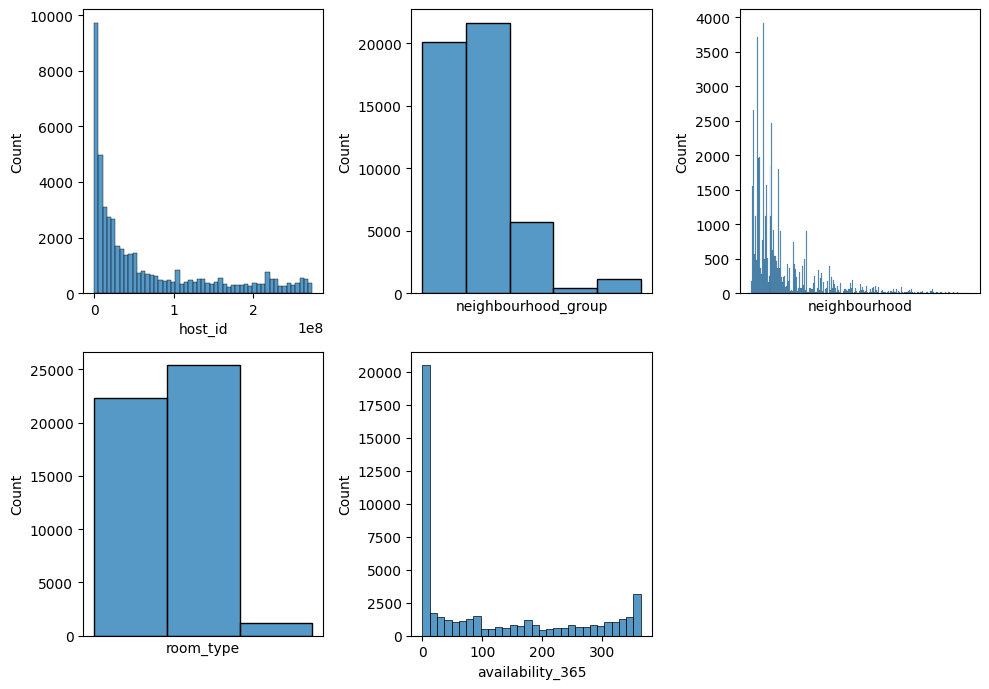

In [10]:
fig, axis = plt.subplots(2,3,figsize=(10,7))
sns.histplot(ax=axis[0,0],data=df,x='host_id')
sns.histplot(ax=axis[0,1],data=df,x='neighbourhood_group').set_xticks([])
sns.histplot(ax=axis[0,2],data=df,x='neighbourhood').set_xticks([])
sns.histplot(ax=axis[1,0],data=df,x='room_type').set_xticks([])
sns.histplot(ax=axis[1,1],data=df,x='availability_365')
fig.delaxes(axis[1,2])
plt.tight_layout()
plt.show()

Análisis de variables numéricas

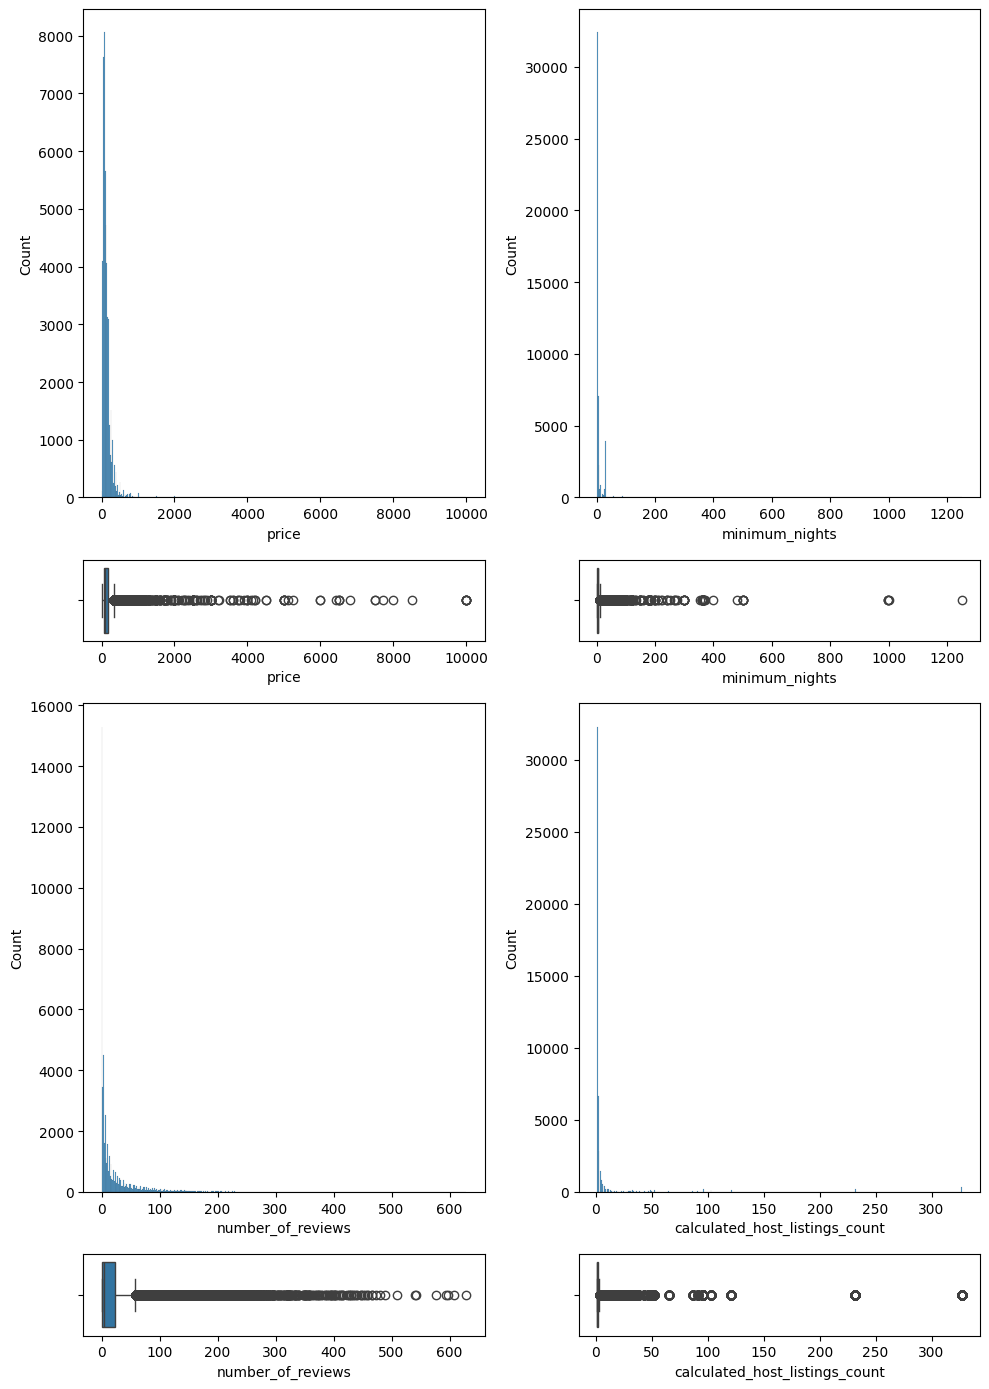

In [11]:
fig, axis = plt.subplots(4,2,figsize=(10,14), gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='price')
sns.boxplot(ax=axis[1,0],data=df,x='price')

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights')
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights')

sns.histplot(ax=axis[2,0],data=df,x='number_of_reviews')
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews')

sns.histplot(ax=axis[2,1],data=df,x='calculated_host_listings_count')
sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count')

plt.tight_layout()
plt.show()

Analisis Multivariable
analisis numérico numérico

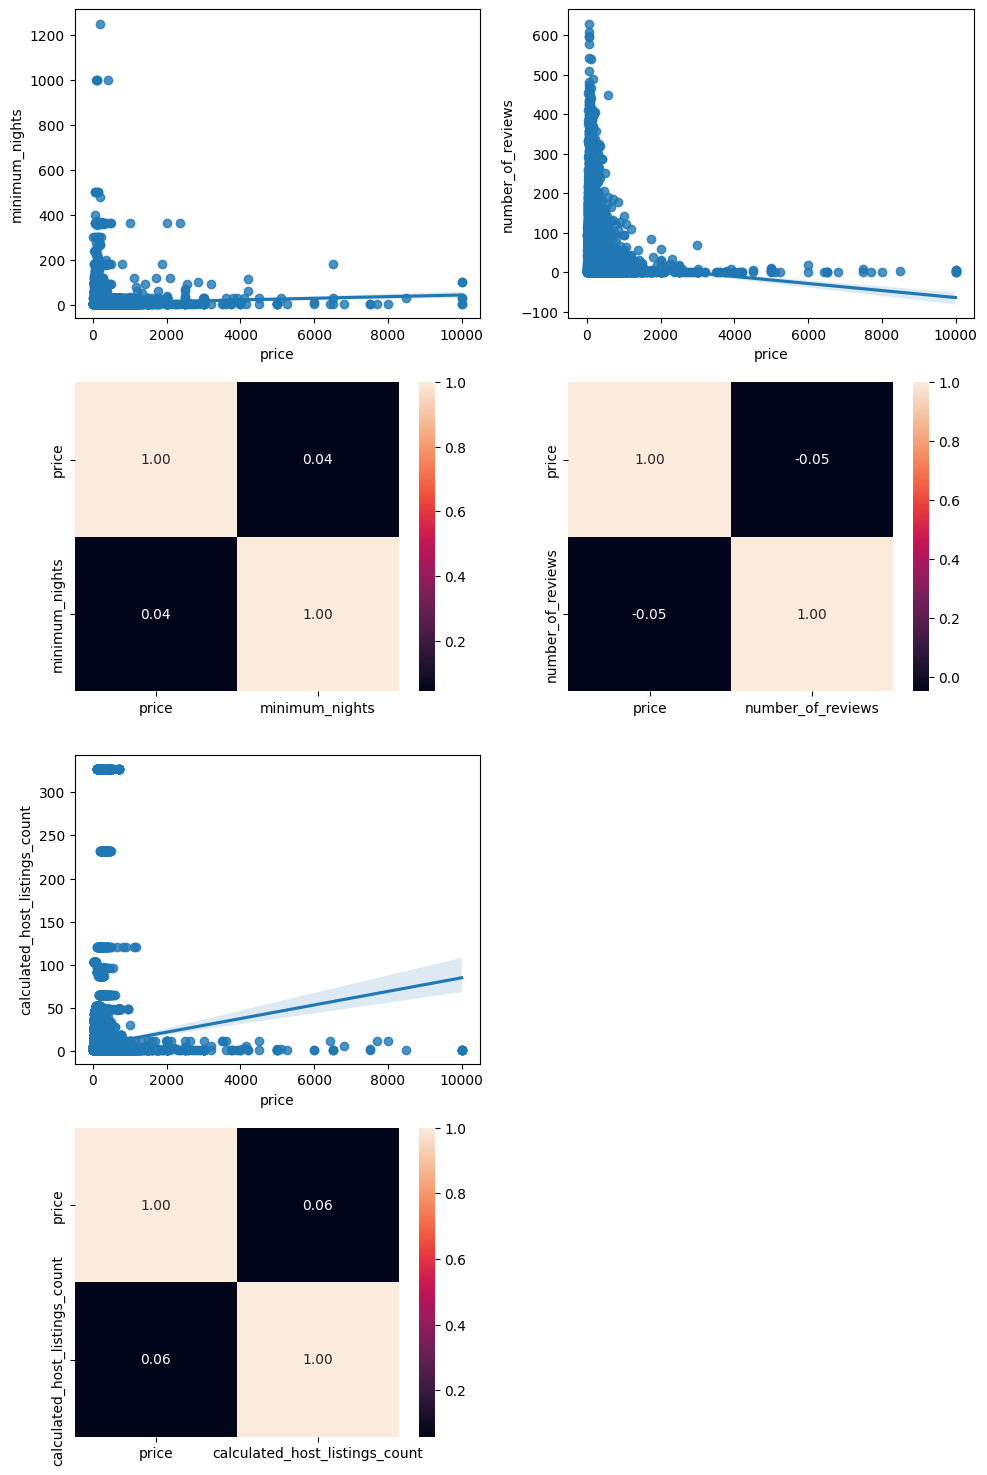

In [17]:
fig,axis = plt.subplots(4,2,figsize=(10,15))
sns.regplot(data=df,x='price',y='minimum_nights',ax=axis[0,0])
sns.heatmap(data=df[['price','minimum_nights']].corr(),annot=True,fmt='.2f',ax=axis[1,0])

sns.regplot(data=df,x='price',y='number_of_reviews',ax=axis[0,1])
sns.heatmap(data=df[['price','number_of_reviews']].corr(),annot=True,fmt='.2f',ax=axis[1,1])

sns.regplot(data=df,x='price',y='calculated_host_listings_count',ax=axis[2,0])
sns.heatmap(data=df[['price','calculated_host_listings_count']].corr(),annot=True,fmt='.2f',ax=axis[3,0])
fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])
plt.tight_layout()
plt.show()

Análisis Categórico- Categórico

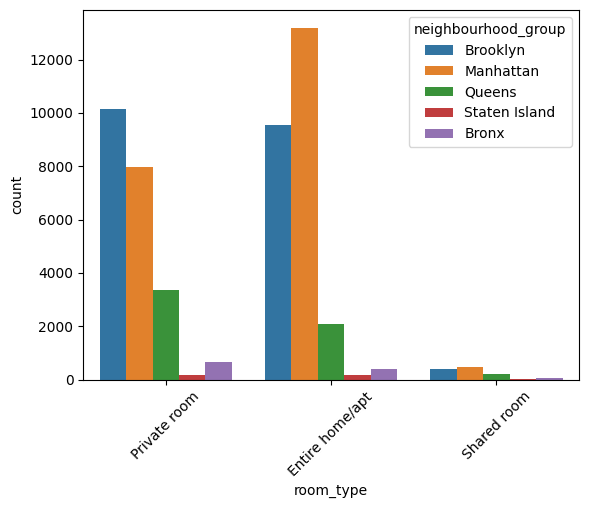

In [19]:
sns.countplot(data=df,x='room_type',hue='neighbourhood_group')
plt.xticks(rotation=45)
plt.show()

Análisis Numérico categorico

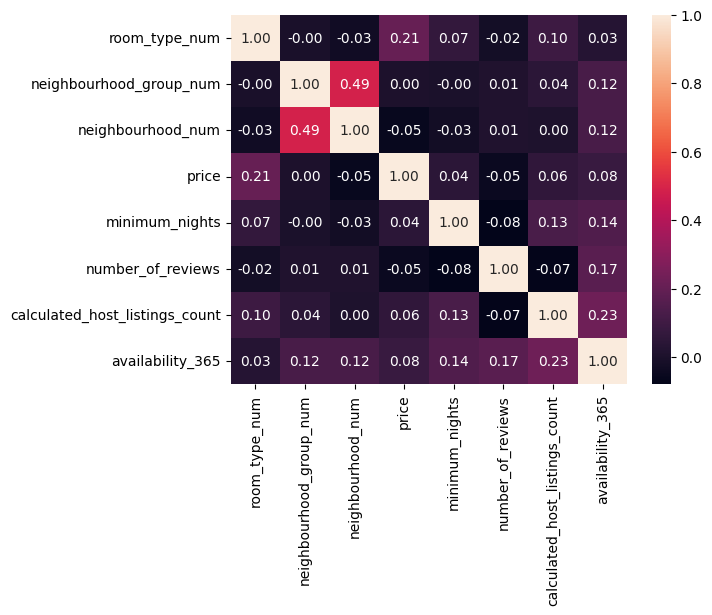

In [21]:
df['room_type_num'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group_num'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood_num'] = pd.factorize(df['neighbourhood'])[0]

sns.heatmap(data=df[['room_type_num','neighbourhood_group_num','neighbourhood_num','price','minimum_nights',
                     'number_of_reviews','calculated_host_listings_count','availability_365']].corr(),annot=True,fmt='.2f')

plt.show()

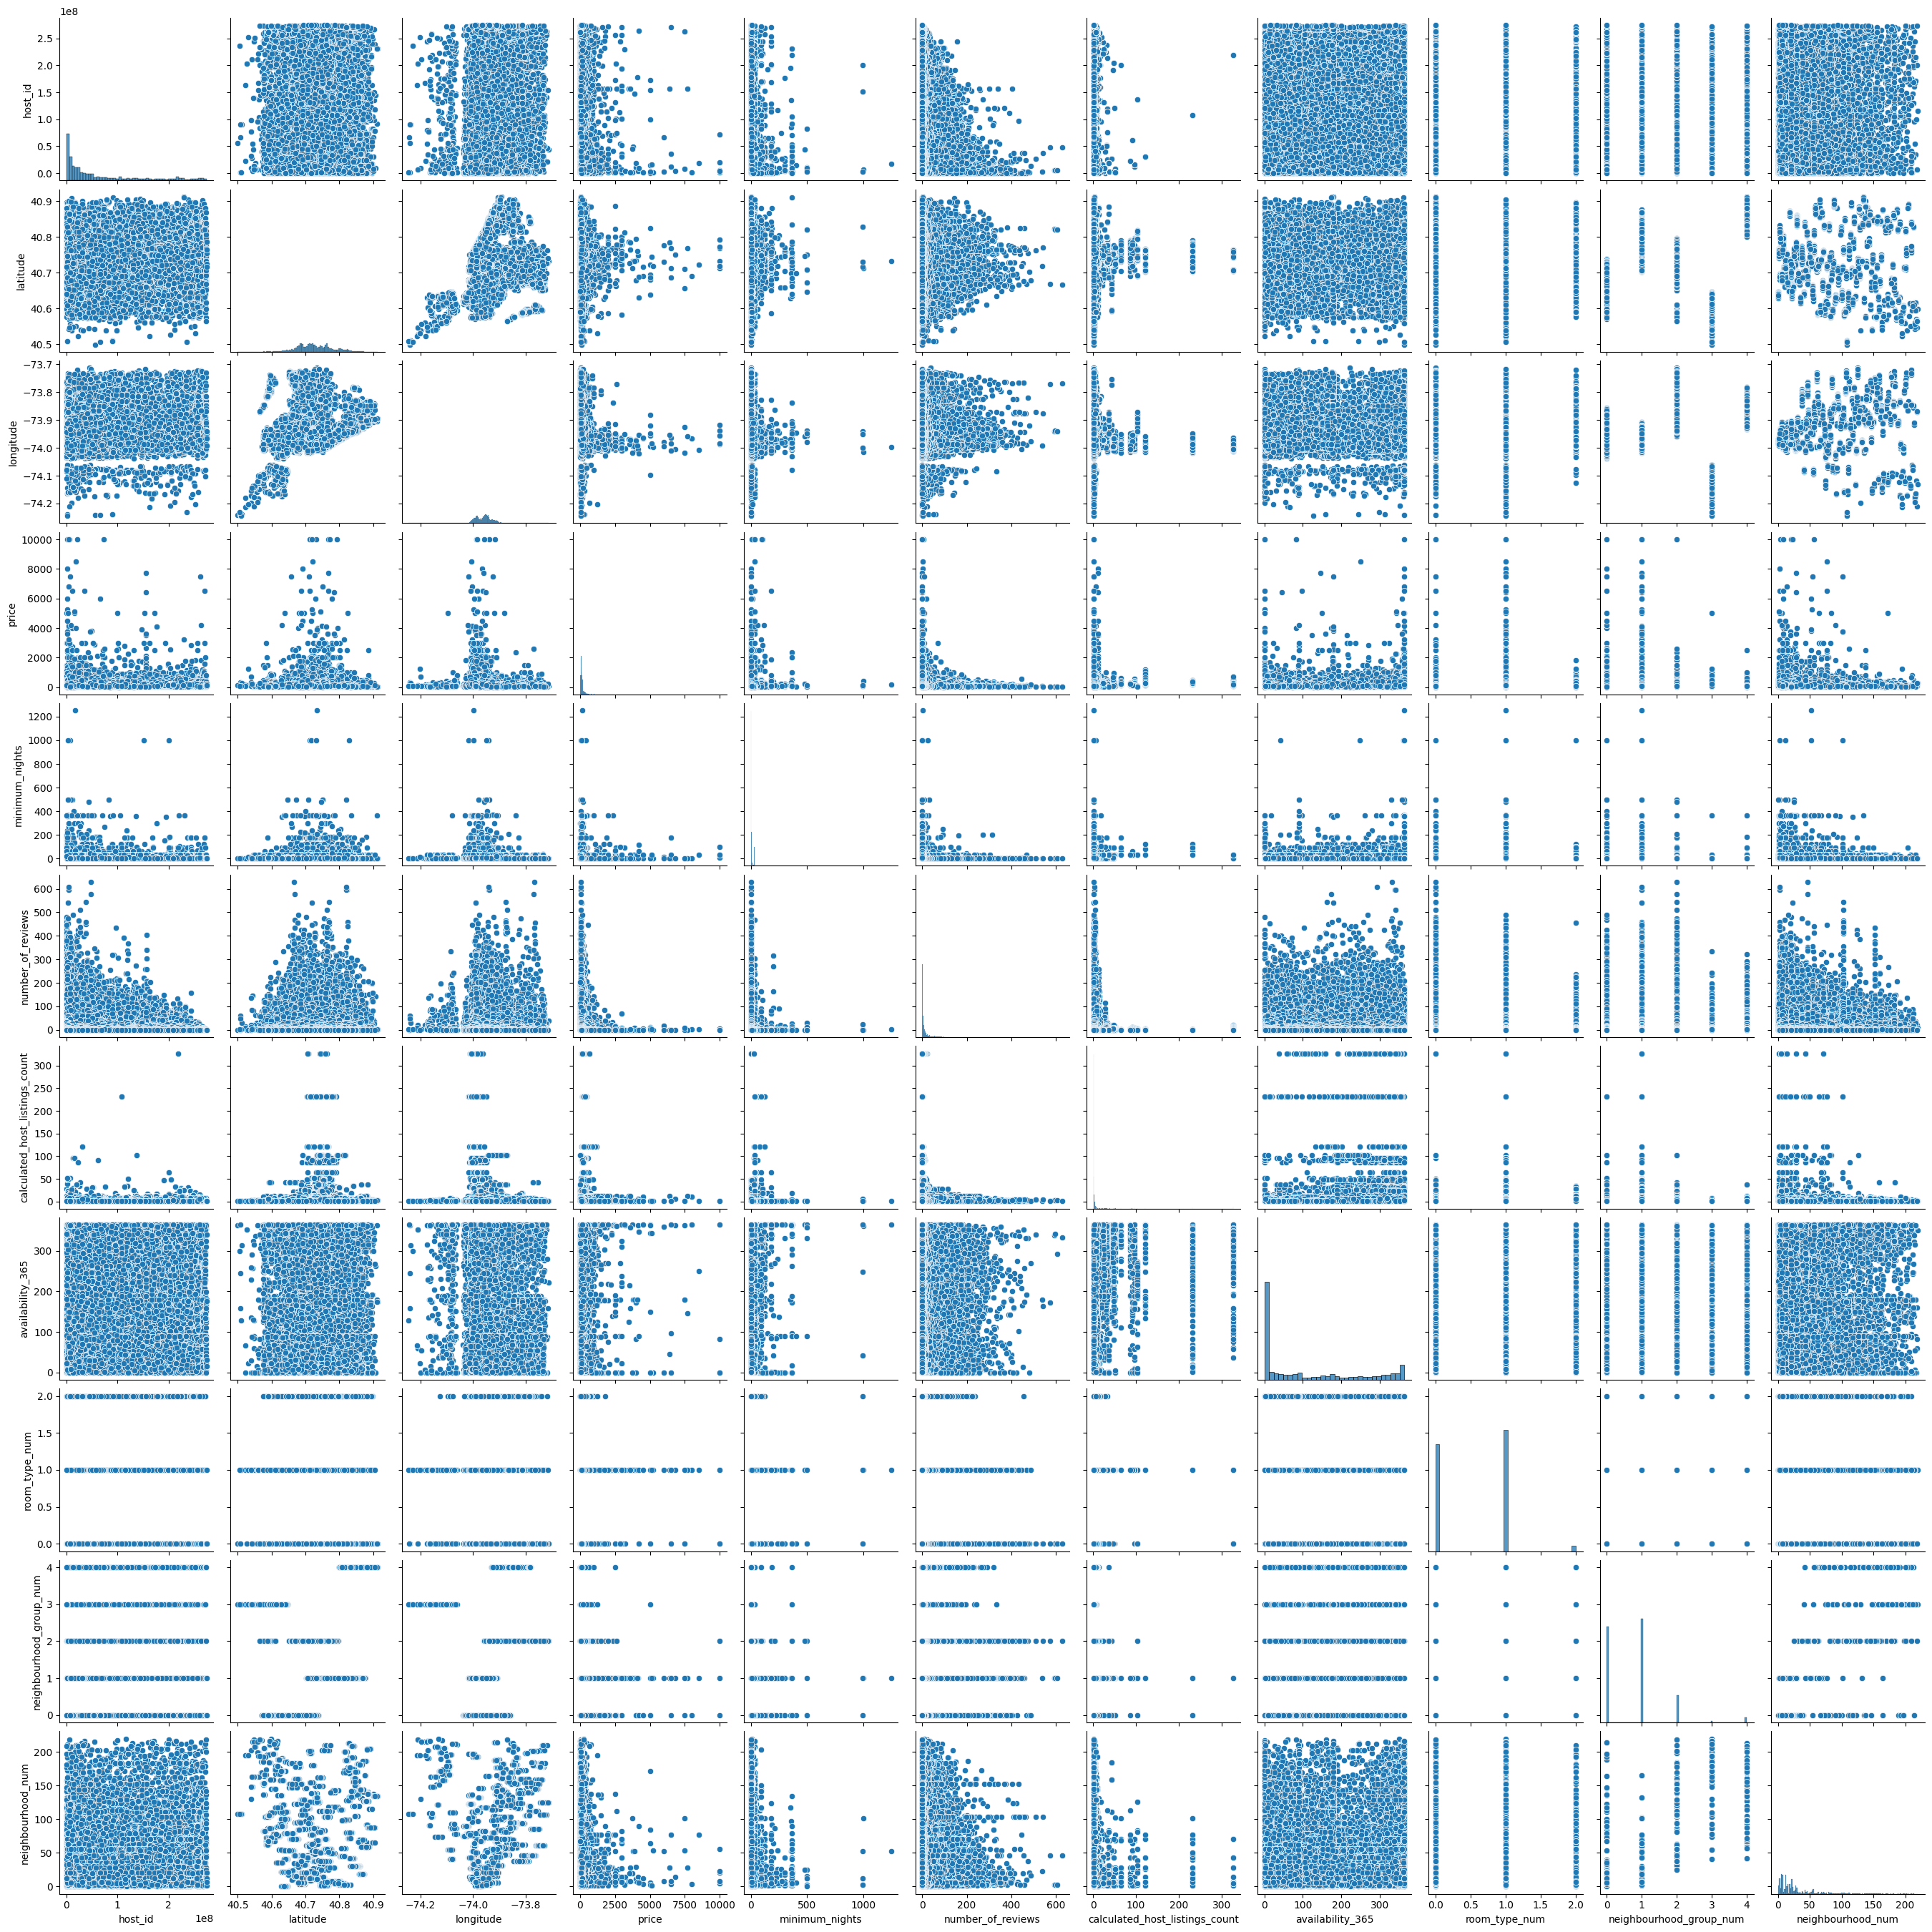

In [22]:
sns.pairplot(data=df)
plt.show()

Paso 5: Ingeniería de Caracteristicas

In [23]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,neighbourhood_num
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000,220.000000


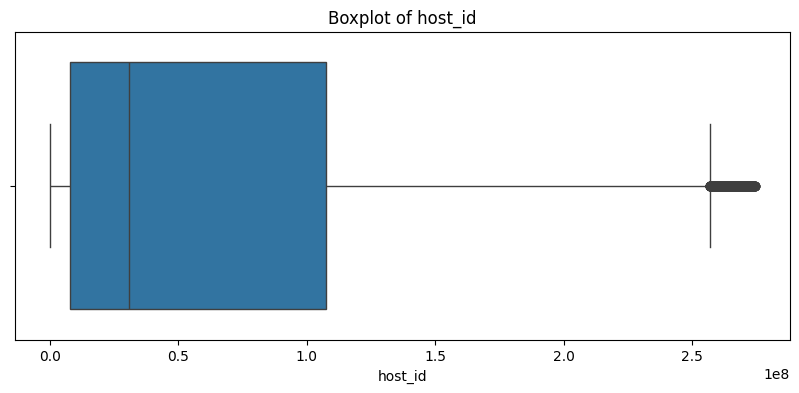

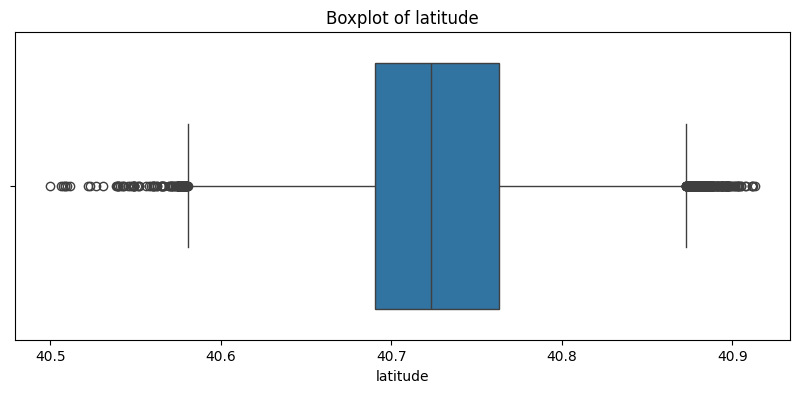

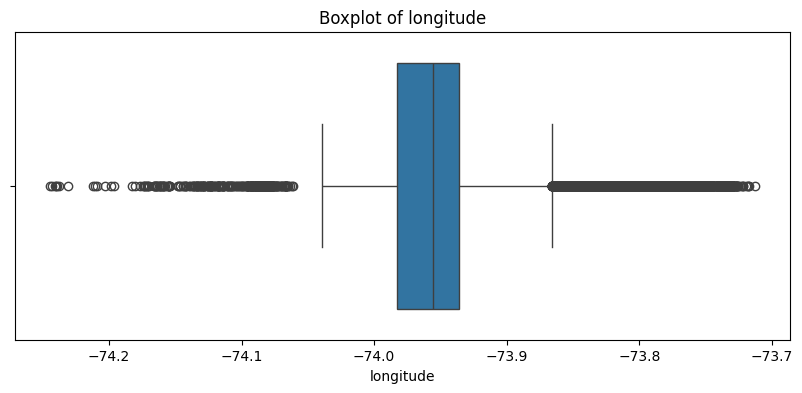

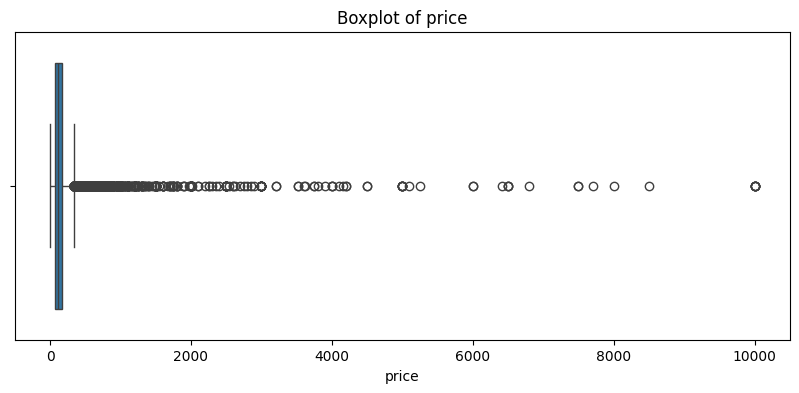

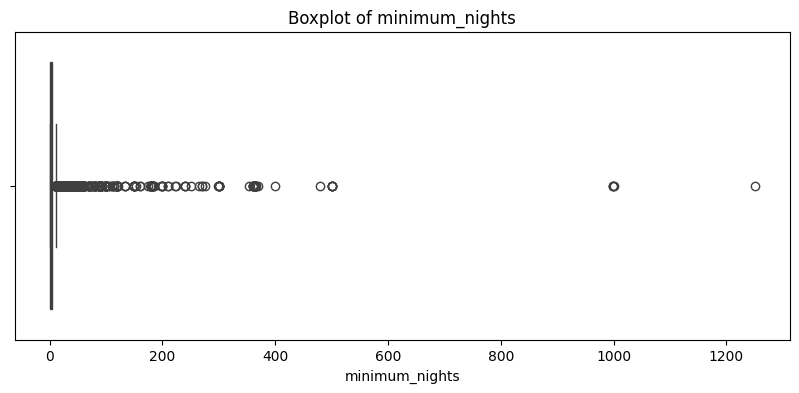

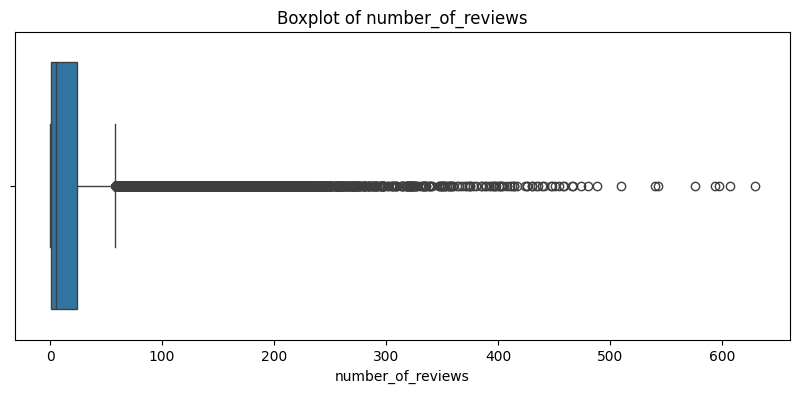

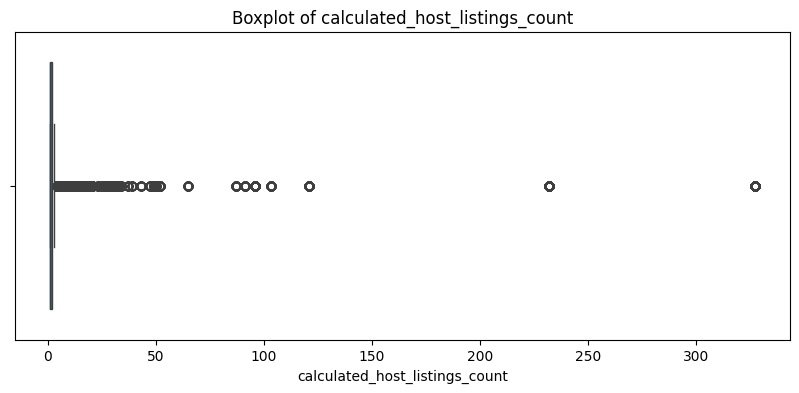

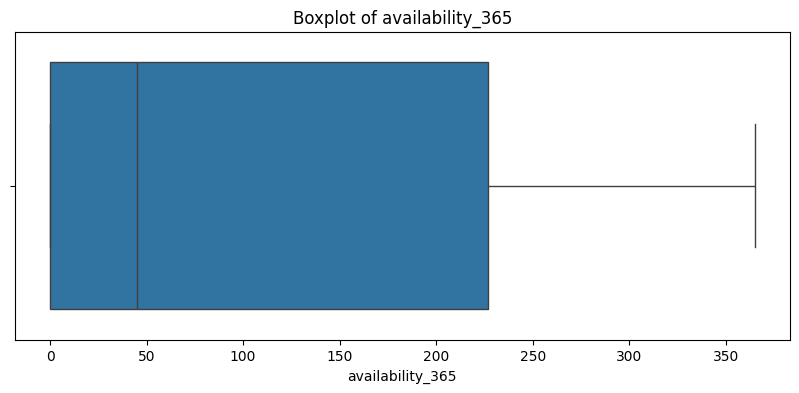

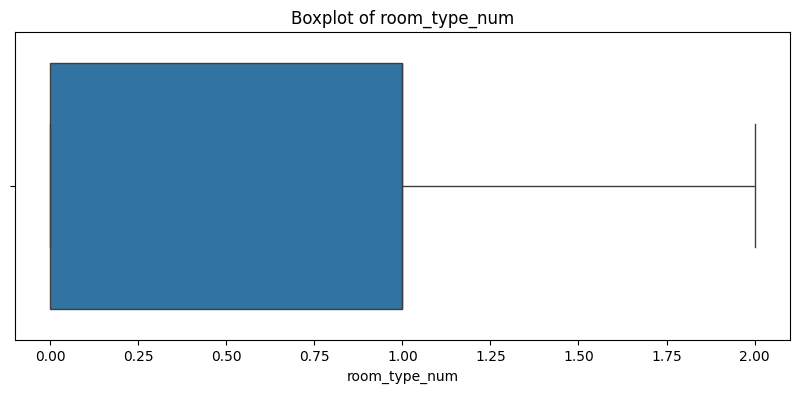

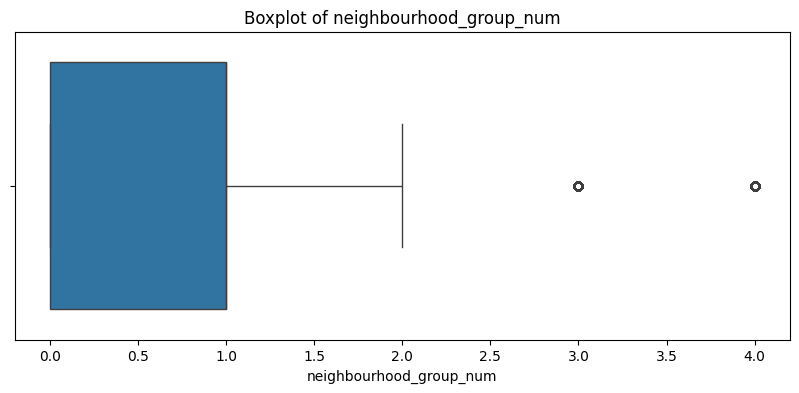

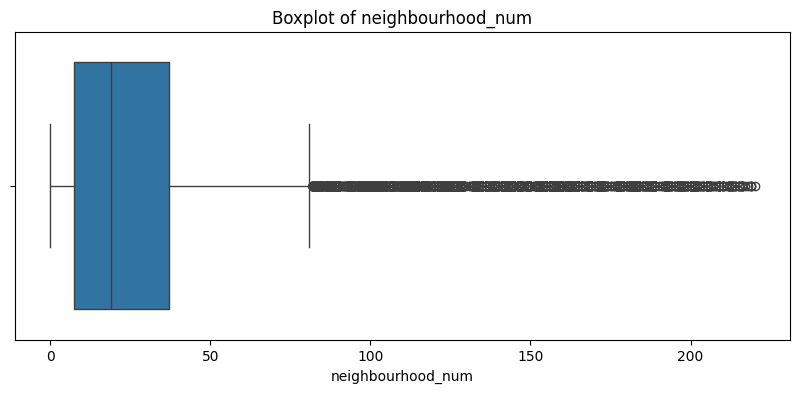

In [24]:
# Paso 5: Ingeniería de Caracteristicas
# analisis de outliers con boxplot

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
stats_nights = df['minimum_nights'].describe()
stats_nights

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [26]:
iqr_nights = stats_nights['75%'] - stats_nights['25%']
lower_bound = stats_nights['25%'] - 1.5 * iqr_nights
upper_bound = stats_nights['75%'] + 1.5 * iqr_nights
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -5.0, Upper Bound: 11.0


In [27]:
df = df[df['minimum_nights'] <= upper_bound]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42288 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         42288 non-null  int64  
 1   neighbourhood_group             42288 non-null  object 
 2   neighbourhood                   42288 non-null  object 
 3   latitude                        42288 non-null  float64
 4   longitude                       42288 non-null  float64
 5   room_type                       42288 non-null  object 
 6   price                           42288 non-null  int64  
 7   minimum_nights                  42288 non-null  int64  
 8   number_of_reviews               42288 non-null  int64  
 9   calculated_host_listings_count  42288 non-null  int64  
 10  availability_365                42288 non-null  int64  
 11  room_type_num                   42288 non-null  int64  
 12  neighbourhood_group_num         42288

Análisis de valores faltantes

In [28]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_num                     0
neighbourhood_group_num           0
neighbourhood_num                 0
dtype: int64

Escalar Variables

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_total = df.drop(columns=['price','host_id'])
X = X_total.select_dtypes(include=['float64', 'int64'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,neighbourhood_num
0,0.625185,0.611501,0.4,0.000000,0.0,0.000000,0.5,0.50,0.254545
1,0.488397,0.606232,0.1,0.131955,0.0,0.526027,1.0,0.00,0.095455
2,0.522612,0.546337,0.9,0.000000,0.0,0.000000,0.5,0.00,0.054545
3,0.687759,0.550232,0.4,0.004769,0.0,0.369863,0.5,0.25,0.127273
4,0.334866,0.423838,0.2,0.001590,0.0,0.000000,0.0,0.00,0.359091


Paso 6: Selección de Caracteristicas

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[selector.get_support()])
X_test_selected = pd.DataFrame(X_test_selected, columns=X_test.columns[selector.get_support()])
X_train_selected.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_num
0,0.4,0.0,0.000000,0.5,0.254545
1,0.1,0.0,0.526027,1.0,0.095455
2,0.9,0.0,0.000000,0.5,0.054545
3,0.4,0.0,0.369863,0.5,0.127273
4,0.2,0.0,0.000000,0.0,0.359091


In [34]:
X_train_selected['price'] = list(y_train)
X_test_selected['price'] = list(y_test)

X_train_selected.to_csv('../data/processed/train_selected.csv', index=False)
X_test_selected.to_csv('../data/processed/test_selected.csv', index=False)